# Car Price Prediction with Machine Learning (Task 3)

In [4]:
# Let's Import all the necessory Librarys for our project
# Such as numpy, pandas, matplotlib, seaborn

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Now let's import the file in which data is saved
data = pd.read_csv("car data.csv")


In [7]:
# view first 5 rows of our data
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
# let's find out that is there any missing value
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [9]:
# To check total count, mean, median of every variable given to us
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
# To chech data type of every characteristic (variable)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
# To count every unique value of veriable having object as a data type
print(data.Fuel_Type.value_counts())
print(data.Selling_type.value_counts())
print(data.Fuel_Type.value_counts())
print(data.Transmission.value_counts())


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [12]:
# To convert such object data type characteristics to int data type
data.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
data.replace({"Selling_type":{"Dealer":0,"Individual":1}},inplace=True)
data.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)
data.head()

C:\Users\shantanu\AppData\Local\Temp\ipykernel_2356\4063430190.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
C:\Users\shantanu\AppData\Local\Temp\ipykernel_2356\4063430190.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"Selling_type":{"Dealer":0,"Individual":1}},inplace=True)
C:\Users\shantanu\AppData\Local\Temp\ipykernel_2356\4063430190.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a futu

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [13]:
# To split the data into x and y
x = data.drop(["Car_Name","Selling_Price"],axis=1) #    x = All Independent variables
y = data["Selling_Price"] #    y = Dependent variable

In [14]:
# Let's check sepration of x and y is succeed or not
x.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [15]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

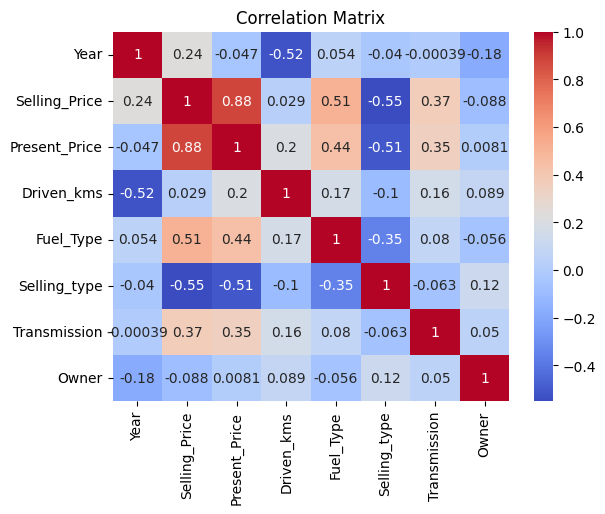

In [16]:
# To draw correlation matrics for visualising the relationship od every variable with each other
data_for_heatmap = data.drop(["Car_Name"],axis=1)
cm=data_for_heatmap.corr() 
sns.heatmap(cm,annot=True,cmap='coolwarm') 
plt.title("Correlation Matrix") 
plt.show()


# By observing above correlation matrics we can say that out of all independent variables there is major impact of Present_Price on Selling_price (dependent variable)



In [17]:
# Now let us split the data horizontally in training data and testing data by trsin_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=34, test_size=0.2)

# Linear Regression 

In [18]:
# TO apply/fit linear regression model on our data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [19]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [20]:
# let's predict the value of dependent variable with the help of independent testing data
lin_y_pred = lin_reg.predict(x_test)

In [21]:
# Now to check fitness of our model with the help of R2 score
from sklearn import metrics
sum_error = metrics.r2_score(y_test, lin_y_pred)
sum_error

0.9052546375216463

In [22]:
from sklearn.metrics import accuracy_score

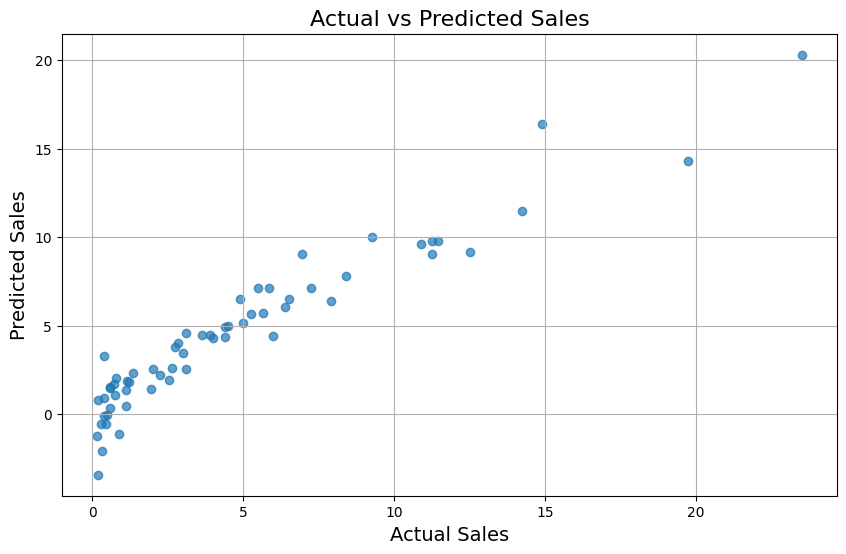

In [23]:
# To visualise the relation between original sales (y_test) and predicted sales (lin_y_pred)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lin_y_pred, alpha=0.7)
plt.title('Actual vs Predicted Sales', fontsize=16)
plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.grid(True)
plt.show()

In [24]:
# Now to check fitness of our model with the help of R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, lin_y_pred)
print("R-squared Score:", r2)


R-squared Score: 0.9052546375216463


# Support Vector Regression

In [25]:
# TO apply/fit Support Vector regression model on our data
from sklearn.svm import SVR
model_svm = SVR()

In [26]:
model_svm.fit(x_train,y_train)

SVR()

In [27]:
# let's predict the value of dependent variable with the help of independent testing data
SVR_y_pred = model_svm.predict(x_test)

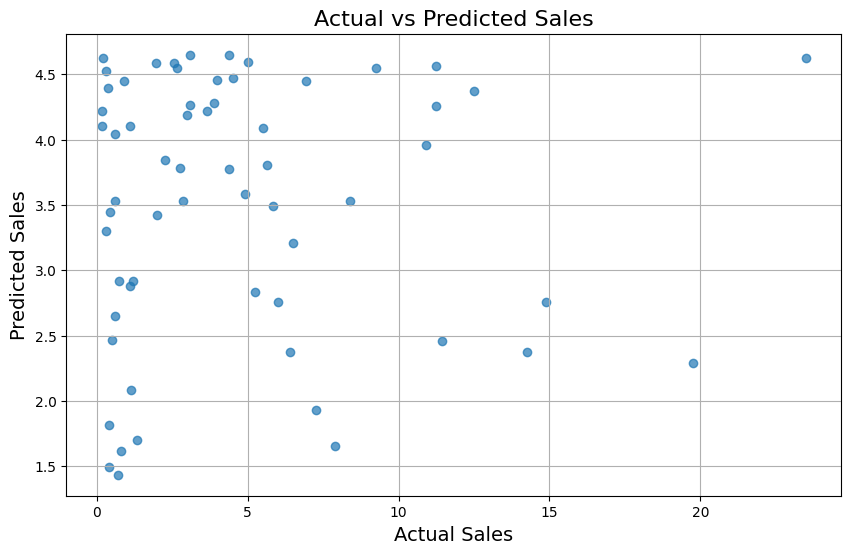

In [28]:
# To visualise the relation between original sales (y_test) and predicted sales (SVR_y_pred)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, SVR_y_pred, alpha=0.7)
plt.title('Actual vs Predicted Sales', fontsize=16)
plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.grid(True)
plt.show()


In [29]:
# Now to check fitness of our model with the help of R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, SVR_y_pred)
print("R-squared Score:", r2)


R-squared Score: -0.08449640062088304


# Random Forest Resression

In [30]:
# TO apply/fit Random Forest Regression model on our data
from sklearn.ensemble import RandomForestRegressor
model_random = RandomForestRegressor()
model_random.fit(x_train, y_train)


RandomForestRegressor()

In [31]:
# let's predict the value of dependent variable with the help of independent testing data
rand_y_pred = model_random.predict(x_test)

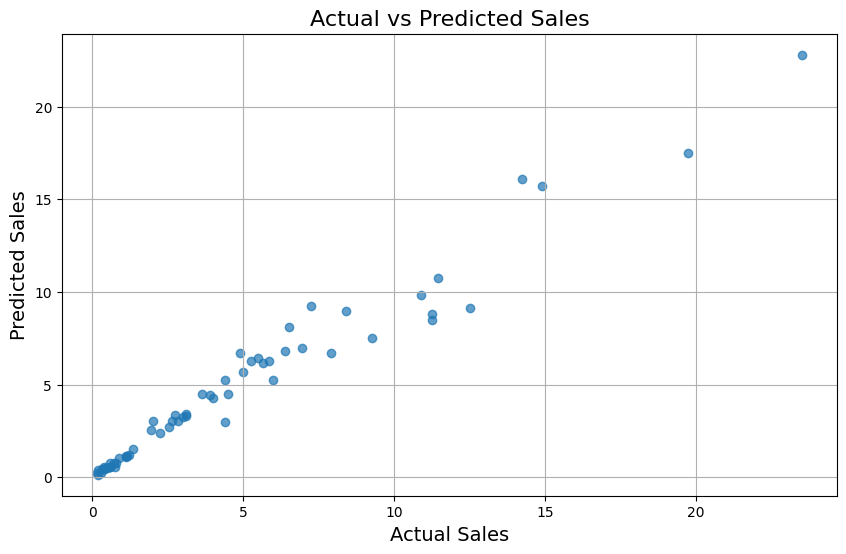

In [32]:
# To visualise the relation between original sales (y_test) and predicted sales (rand_y_pred)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rand_y_pred, alpha=0.7)
plt.title('Actual vs Predicted Sales', fontsize=16)
plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.grid(True)
plt.show()


In [33]:
# Now to check fitness of our model with the help of R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, rand_y_pred)
print("R-squared Score:", r2)


R-squared Score: 0.9595741731125527


# Here we applyed 3 Machine Learning models, out of them Random Forest Regression have maximum r2 score (0.9599391529317204)
# So now we are ready to use this model for Car Price Prediction